# Starbucks Capstone Challenge

# Introduction


For this project, we will have an opportunity to analyse Starbucks mobile app customer base data and their responses towards promotion offers. First we will explore, clean the data and then make exploratory analysis to find out customer based statistic. Subseqently, we aim to make on what the app should make recommendation offer to the new customer on the app with a machine learning model

## About Starbucks and Mobile App Program

### Starbuck
Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington since 1971[1]. It is currently the world's largest coffeehouse chain store, serving a variety of beverages from hot/cold coffee/tea to the In addition to drinks and food, many stores carry Starbucks' official merchandise, such as mugs, tumblers, scoops, and coffee presses. Not limited to store front sales, drinks (canned drink, expresso capsules) sporting Starbuck label has appeared in supermarket and online shops[2]

### Mobile Application
Starbucks is one of the early adopter of mobile application. In May 2008, a loyalty program was introduced for Starbucks Card registered users offering perks such as free Wi-Fi Internet access etc. 3 Years on, it began beta testing its mobile app for the Starbucks card, offering prepaid services. Subsequently, Starbucks released its complete mobile platform by January 2011. By December 2011, the number of mobile transactions exceeded 26 million. It is estimated that 30% of the Starbuck transactions is through mobile compared to Apple Pay, which is only used by ~5% of customers in 2018 [3]

## Information on Data Set
The provided data set for this project contains simulated data (containing transactions, customer spread and offer types) which mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks and not every user will have the same offer offered to the next

#### Validity Period
Every offer has a validity period before the offer expires. For example, a BOGO offer might be valid for only 5 days. The data set contains also informational offers which are merely providing information about a product. Accordingly, if an informational offer has 7 days of validity, one can assumed the customer is under the influence of the offer for 7 days after receiving the advertisement. It can be shown from the transactional data shows the timestamp of each purchase as well as the amount of money spent when user make purchases on the app. The transactional data also has a record for each offer that a user receives, a record for when a user actually views the offer and finally when a user completes an offer. 

Conversely, user should also note that it is possible that a customer using the app might make a purchase through the app without having received an offer or seen an offer.

#### Rewards System
To give an example how the reward process works, a user could receive a discount offer buy 10 dollars get 2 off. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer. 

It has also to be considered that a customer can receive an offer, never actually views the offer, and still completes the offer. For example, a customer might receive the "buy 10 dollars get 2 dollars off offer", but never opens the offer during the 10 day validity period, while he spends 15 dollars during those ten days. Thus there will be an offer completion record in the data set while the customer was not influenced by the offer.[2]

## On Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Part I : Define the business problem

The first part of our studies is to define our business problem
<ol>
    <li> What is the age, gender and income demographics of the customer group? Who formed the majority of the Starbucks customer base ?</li>
    <li> Which is the most effective channel in dispensing out information </li>
    <li> Which group (age, income, membership length) of customers appear to be more responsive towards the promotion
    <li> Is there link between the offer given and the target group? </li>
    <li> Which type of promotional offer most appeal to which group of customer?</li>
    <li>Can we build a recommendation engine to recommend promotional offer with good uptake rate to new customers based on their demographical data age, income, registration date and gender?</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files
portfolio   = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile     = pd.read_json('data/profile.json',   orient='records', lines=True)
transcript  = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
## update the pandas package as suggested above

# if (float(pd.__version__) > 1.53):
#     print('version is greater')
# !conda update pandas

# Part II : Analyze


We will analyze the problem(with the 3 pandas DataFrame) through visualizations and data exploration to have a better understanding of what algorithms and features are appropriate for solving it.

### Portfolio

In [3]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
portfolio.describe(include='all')

,reward,channels,difficulty,duration,offer_type,id
count,10.000000,10,10.000000,10.000000,10,10
unique,NaN,4,NaN,NaN,3,10
top,NaN,"[web, email, mobile, social]",NaN,NaN,bogo,ae264e3637204a6fb9bb56bc8210ddfd
freq,NaN,4,NaN,NaN,4,1
mean,4.200000,NaN,7.700000,6.500000,NaN,NaN
std,3.583915,NaN,5.831905,2.321398,NaN,NaN
min,0.000000,NaN,0.000000,3.000000,NaN,NaN
25%,2.000000,NaN,5.000000,5.000000,NaN,NaN
50%,4.000000,NaN,8.500000,7.000000,NaN,NaN
75%,5.000000,NaN,10.000000,7.000000,NaN,NaN


In [5]:
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

### Description of Portfolio Data

This data contains 10 campaign offers that is run together with Starbuck Customer, of which there are 3 types of promotion types being offered and the campaign offers is run with up to 4 types of channels. There is no missing data in the set and so we did not need to impute any value. Below tells of the detail for each column

**portfolio.json schema**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer, - cost to consumer
* reward (int) - reward given for completing an offer - cost to Starbuck
* duration (int) - time for offer to be open, in days
* channels (list of strings), ie web, email, mobile, social

### The following cleansing work would be neccessary
<ol> 
    <li> To expand the channels column into multiple columns based on the list atttribute: namely web, email, mobile and social  
    <li> To expand the offer_type, a form of categorical data, into individual columns
    <li> Convert the duration to number of hours instead of days
    <li> Normalize some of the value 
</ol>

### Profile

In [6]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [7]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


To find out how many person is of age 118

In [8]:
profile.age[profile.age==118].count()

2175

In [9]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

The number of people with age 118 matches with the number of people without gender and without income data

### Description of Profile Data

A glimpse at the data show there is a number of customers, (2175 to be exact) at 118 year old! A small trivial[4], the oldest known living person  has managed to live a year of 122 and the number of people who have live to that age is not more than 10. Starbucks could not possibly get so many customer who is of 118. <br>

A plausible explanation could be that the customer refuse to leave his/her identity information. The number of customer who did not have their gender, income or age is the same, 2175. We might be wanting to remove this set of user, even though it represented about 10% of the total user database

We might also want to convert the became member 

**profile.json schema**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

The following cleansing work would be neccessary

<ol> 
    <li> To drop the members with 118 years of age     
    <li> To convert "became_member_on" to "membership". Would need to change from string format YYYYMMDD representatation to one that is based on year they have been member
    <li> Normalize some of the value 
</ol>

### Transcript

In [10]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [11]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [12]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [13]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### Description of Transcript Data



transcript.json

    event (str) - record description of type transaction, offer received, offer viewed, offer completed
    person (str) - customer id
    time (int) - time in hours since start of test. The data begins at time t=0
    value - (dict of strings) - either an offer id or transaction amount depending on the record


The following cleansing work would be neccessary 

<ol>
    <li> To remove transaction of those users which have been removed in profile json 
    <li> To expand the event column, a form of categorical data, into individual binary columns of transaction, offer received, offer viewed, offer completed
    <li> To make matter simple, formed a new column call campaign_success based on customer would have to view the offer and complete the offer, then it would consider as campaign success while completion of offer without actually viewing the offer would consider to be a failure
    <li> To extract out the value type into either one indicating of offer_id or transaction amount. Consideration is also taken to drop those transaction amount data
    <li> Normalize some of the value 
</ol>

Finally then combine the 3 dataframe to form a master dataframe

# Part III :  Data Cleansing

We perform cleaning and engineering for all data sets (portfolio, profile, transcript) and we will focus on common working steps:

<ul>
    <li> convert dtype of features where necessary eg from datetime to string or vice versa </li>
    <li> drop rows with missing data or outliers </li>
    <li> drop rows with duplicated data </li>
    <li> group data for further data analysis </li>
    <li> create new features with binaries from categorical variables </li>
    <li> normalize data for columns with a different range of values </li>
</ul>

Cleaning up the portfolio dataset

In [14]:
## copy a copy of the portfolio dataset
portfolio_df  = portfolio.copy()

Create new columns(web, emaiil,mobile & social) from channels

In [15]:
channels_list  =  ['web', 'email', 'mobile', 'social'] 

for index in channels_list: 
    portfolio_df[index] = portfolio_df.channels.apply(lambda x: (index in x)+0)

print(portfolio_df)

   reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  web  email  mobile  social  
0  ae264e3637204a6fb9bb56bc8210ddfd    0      1      

Convert offer_type from categorical into numerical data

In [16]:
portfolio_df.offer_type = portfolio_df.offer_type.replace(['bogo', 'informational', 'discount'],
                          [0, 1, 2])

Changing the duration from day into hours

In [17]:
portfolio_df.duration  = portfolio_df.duration * 24

Normalizing the data in portfolio

In [18]:
## normalize difficulty column
portfolio_df.difficulty = portfolio.difficulty /5

## normalie duration column
portfolio_df.duration = portfolio.duration /portfolio.duration.max()

portfolio_df = portfolio_df.drop('channels', axis=1)

print(portfolio_df)

   reward  difficulty  duration  offer_type                                id  \
0      10         2.0       0.7           0  ae264e3637204a6fb9bb56bc8210ddfd   
1      10         2.0       0.5           0  4d5c57ea9a6940dd891ad53e9dbe8da0   
2       0         0.0       0.4           1  3f207df678b143eea3cee63160fa8bed   
3       5         1.0       0.7           0  9b98b8c7a33c4b65b9aebfe6a799e6d9   
4       5         4.0       1.0           2  0b1e1539f2cc45b7b9fa7c272da2e1d7   
5       3         1.4       0.7           2  2298d6c36e964ae4a3e7e9706d1fb8c2   
6       2         2.0       1.0           2  fafdcd668e3743c1bb461111dcafc2a4   
7       0         0.0       0.3           1  5a8bc65990b245e5a138643cd4eb9837   
8       5         1.0       0.5           0  f19421c1d4aa40978ebb69ca19b0e20d   
9       2         2.0       0.7           2  2906b810c7d4411798c6938adc9daaa5   

   web  email  mobile  social  
0    0      1       1       1  
1    1      1       1       1  
2    1      

#### Cleaning up profile dataframe

changing the "became_member_on" to member since the earliest date

In [19]:
## make a copy of profile
profile_df = profile.copy()

Removing the user with age 118, no gender and income information

In [20]:
profile_df = profile_df[profile_df.age!=118]
profile_df_size = 17000-2175

### sanity check on profile - after removing
assert profile_df.shape[0] >= profile_df_size , "the size is not right"

Changing the data in column "became_member_on" to "membership"

In [21]:
## rename the columns
profile_df.rename(columns = {'became_member_on':'membership'}, inplace=True)
                             
base_year  = int(profile_df.membership.max() /10000) 
profile_df['membership']= profile_df.membership.apply(lambda x: base_year - int(x/10000)  )

#### Cleaning up transcript dataframe

In [22]:
transcript_df = transcript.copy()

Removing those records whose user does not appear in the new profile dataframe

In [23]:
transcript_df = transcript_df.value.apply(lambda x: (index in x)+0)

transcript_df = transcript[transcript['person'].isin(profile_df['id'])]

transcript_df.count()

person    272762
event     272762
value     272762
time      272762
dtype: int64

We have almost removed 10% of the records in transcript

In [24]:
transcript_df.event.value_counts()

transaction        123957
offer received      66501
offer viewed        49860
offer completed     32444
Name: event, dtype: int64

Changing the event categories into individual columns (binary)

In [25]:
event_list  =  ['transaction', 'offer received', 'offer viewed', 'offer completed'] 

transcript_df_events = pd.DataFrame()


for index in event_list: 
    transcript_df_events[index] = transcript_df.event.apply(lambda x: 1 if x == index else 0)

print(transcript_df_events)

        transaction  offer received  offer viewed  offer completed
0                 0               1             0                0
2                 0               1             0                0
5                 0               1             0                0
7                 0               1             0                0
8                 0               1             0                0
...             ...             ...           ...              ...
306527            0               0             0                1
306529            1               0             0                0
306530            1               0             0                0
306531            1               0             0                0
306532            1               0             0                0

[272762 rows x 4 columns]


Dropping the transaction column 

In [ ]:
transcript_df_events.success = transcript_df_events['offer viewed']

Changing the values categories into individual columns (binary)

In [26]:
value_list  =  ['amount', 'offer_id', 'offer id'] 

transcript_df_value = pd.DataFrame()

for index in value_list: 
    transcript_df_value[index] = transcript_df.value.apply(lambda x: x.get(index) if x.get(index) != None else "" )

transcript_df_value['offer_id']   = transcript_df_value['offer_id']  + transcript_df_value['offer id'] 
transcript_df_value.drop('offer id', axis=1, inplace=True)
print(transcript_df_value)

       amount                          offer_id
0              9b98b8c7a33c4b65b9aebfe6a799e6d9
2              2906b810c7d4411798c6938adc9daaa5
5              f19421c1d4aa40978ebb69ca19b0e20d
7              3f207df678b143eea3cee63160fa8bed
8              0b1e1539f2cc45b7b9fa7c272da2e1d7
...       ...                               ...
306527         fafdcd668e3743c1bb461111dcafc2a4
306529   1.59                                  
306530   9.53                                  
306531   3.61                                  
306532   3.53                                  

[272762 rows x 2 columns]


In [27]:
frame = [transcript_df, transcript_df_events,transcript_df_value]

transcript_df = pd.concat(frame)
print(transcript_df)

                                  person           event  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   
2       e2127556f4f64592b11af22de27a7932  offer received   
5       389bc3fa690240e798340f5a15918d5c  offer received   
7       2eeac8d8feae4a8cad5a6af0499a211d  offer received   
8       aa4862eba776480b8bb9c68455b8c2e1  offer received   
...                                  ...             ...   
306527                               NaN             NaN   
306529                               NaN             NaN   
306530                               NaN             NaN   
306531                               NaN             NaN   
306532                               NaN             NaN   

                                                   value  time  transaction  \
0       {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}   0.0          NaN   
2       {'offer id': '2906b810c7d4411798c6938adc9daaa5'}   0.0          NaN   
5       {'offer id': 'f19421c1d4aa40978ebb

Dropping non essential columns

In [28]:
transcript_df.drop(['value', 'event', 'transaction', 'offer received'], axis=1, inplace=True)


print(transcript_df)

                                  person  time  offer viewed  offer completed  \
0       78afa995795e4d85b5d9ceeca43f5fef   0.0           NaN              NaN   
2       e2127556f4f64592b11af22de27a7932   0.0           NaN              NaN   
5       389bc3fa690240e798340f5a15918d5c   0.0           NaN              NaN   
7       2eeac8d8feae4a8cad5a6af0499a211d   0.0           NaN              NaN   
8       aa4862eba776480b8bb9c68455b8c2e1   0.0           NaN              NaN   
...                                  ...   ...           ...              ...   
306527                               NaN   NaN           NaN              NaN   
306529                               NaN   NaN           NaN              NaN   
306530                               NaN   NaN           NaN              NaN   
306531                               NaN   NaN           NaN              NaN   
306532                               NaN   NaN           NaN              NaN   

       amount              

## Exploratory Data Analysis

##### What is the age, gender and income demographics of the customer group? Who formed the majority of the Starbucks customer base ?

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

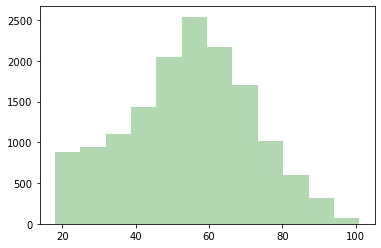

In [29]:
num_bins = 12
n, bins, patches = plt.hist(profile_df['age'], num_bins, 
                            color ='green',
                            alpha = 0.3)

plt.hist(profile.age[profile_df['gender']=='M'], num_bins, 
                            color ='blue',
                            alpha = 0.3)

plt.hist(profile.age[profile_df['gender']=='F'], num_bins, 
                            color ='red',
                            alpha = 0.3)

plt.xlabel('Age')
plt.ylabel('Customers')
  
plt.title('Histogram Plot of Customer Age Range\n',
          fontweight ="bold")

plt.legend(['Customer', 'Male', 'Female'])
  
plt.show()
   

In terms of gender, there is more men in the survey than women, particularly in age range between 20-45, there is almost twice as many men than woman in the database

In [ ]:
income_range = [30000, 49000, 64000, 80000, 120000]
income_quartile = [0, 25, 50, 75, 100]

plt.plot(income_quartile, income_range, 'go--', linewidth=2, markersize=12)

plt.show()

The income range spread over the customer group base rather linearly and evenly for the income for 80k and below but it rises rapidly for those with high income

In [ ]:
## rename the columns
profile_df.rename(columns = {'became_member_on':'membership'}, inplace=True)
                             
base_year = int(profile_df.membership.max() /10000)  
profile_df['membership']= profile_df.membership.apply(lambda x: base_year - int(x/10000)  )

In [ ]:
## set the NaN value in dataframe to be zero 
profile_df = profile_df.fillna(0)

## 
profile_full_df= profile_df[profile_df['income'] != 0]
profile_anon_df= profile_df[profile_df['income'] == 0]

profile_full_df.head()

In [ ]:
fig, axes = plt.subplots(1, 2)
num_bins = 12

profile[profile['gender']=='M'].hist('income', bins=100, color ='blue', alpha=0.3, ax=axes[0])
profile[profile['gender']=='F'].hist('income', bins=100, color ='red', alpha=0.3, ax=axes[1])

Starbucks male client demographics seem to concentrate on middle to lower earning customer base while female customer base exhibits a normal-distributed pattern

###### Which is the most effective channel in dispensing out information
    <li> 
    <li>  </li>
    <li> </li>
    <li></li>

###### Which group (age, income, membership length) of customers appear to be more responsive towards the promotion

###### Is there link between the offer given and the target group?

###### Which type of promotional offer most appeal to which group of customer?

###### Can we build a recommendation engine to recommend promotional offer with good uptake rate to new customers based on their demographical data age, income, registration date and gender? 

## Modeling and Evaluation

## Deployment


# References 

<ol>
    <li>Starbuck Wikipaedia, https://en.wikipedia.org/wiki/Starbucks</li>
    <li>Starbuck Company Website, https://www.starbucks.com/about-us/ </li>
    <li>https://digital.hbs.edu/platform-digit/submission/starbucks-mobile-app-a-winner-in-bridging-the-retail-digital-divide/ </li>
    <li>List of the verified oldest people, <https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people</li>
    </ol>